# 알려진 확률 분포

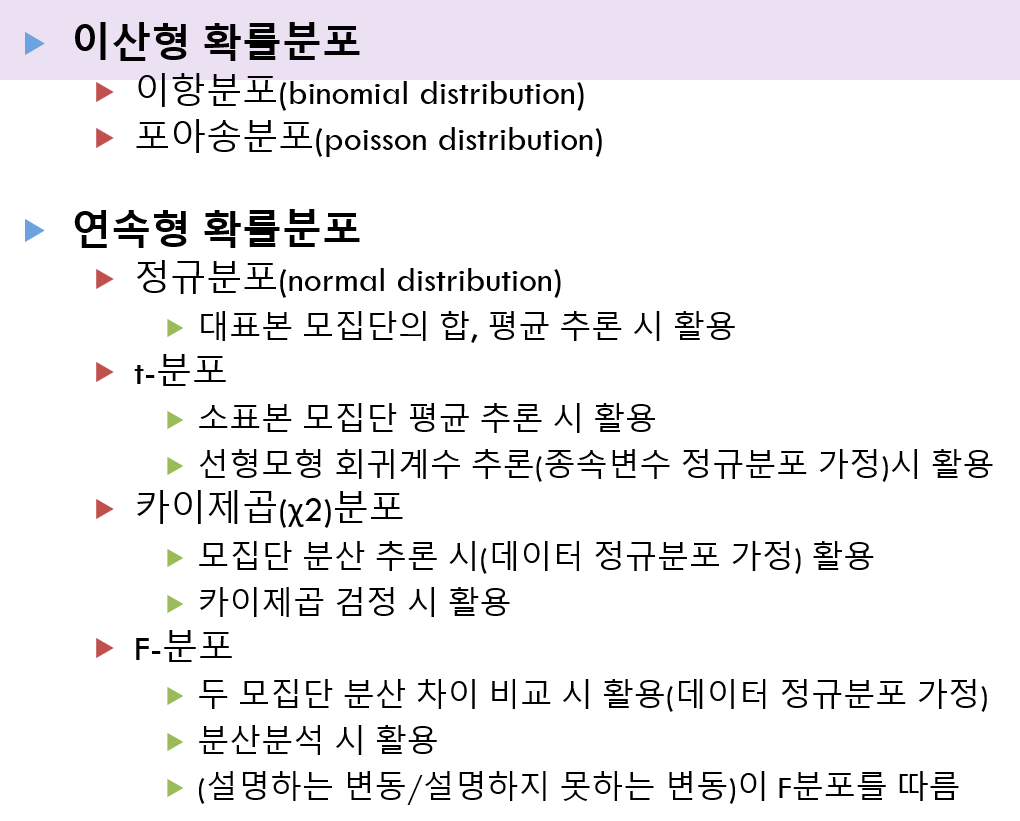

# 대표적인 이산형 확률분포

- 베르누이 분포 => 이항분포(binomial distribution)
- 포아송 분포


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
# 필요 함수 정의

# 그래프 선의 종류
linestyles = ['-', '--', ':']

# 기댓값 계산 함수
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

# 분산 계산 함수
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

# 확률분포 X에 대하여 확률함수 통해 확률율 계산
# 확률이  모두 0보다크고, 합은 1인지 체크하는 함수
# 이산확률분포 성질 만족하는지 확인하는 함수
# 만족하면 기댓값과 분산 출력
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
# 그래프 작성 함수
# 확률분포의 그래프 그리는 함수
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

### 베르누이 시행
- 시행 또는 실험의 결과가 두 가지 (성공(S), 실패(F)) 중 하나인 경우
    - 각 시행의 결과는 성공(S)과 실패(F) 중 하나로 분류할 수 있다.
    - 각 시행에서 성공의 확률은 𝑝이다.
    - 각 시행은 서로 독립이다.
    
- 예) 동전 던지기
- 예) 5개의 불량품과 10개의 정상 제품 중에서 임으로 하나씩 꺼낼 때
    - 복원추출의 경우: 불량품의 확률이 1/3인 베르누이시행
    - 비복원추출의 경우: 베르누이 시행이 아님(why?)
        - 불량품이나 정상제품이 하나씩 소멸되므로 성공과 실패의 확률이 변동됨
            - 각 시행이 독립이 아니고 종속됨


### 베르누이 분포 

-  확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포
    - 베르누이 분포를 따르는 확률변수의 시행이 베르누이 시행
    - 1은 성공, 0은 실패
    - 1이 나오는 확률은 𝑝, 0이 나오는 확률은 1−𝑝
    - 파라미터 𝑝인 베르누이 분포는 Bern(𝑝)
    
    
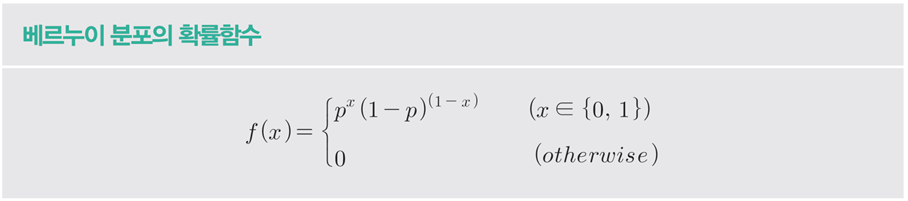
    


- 동전을 던져 앞면이 나올 확률

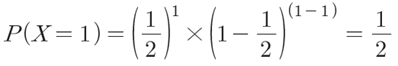


- 주사위를 한 번 굴려 6이 나오지 않을 확률
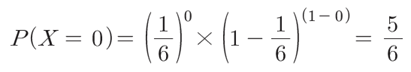

## 베르누이 분포를 함수로 구성

In [3]:
def Bern(p) :
    x_set = np.array([0,1])
    def f(x) :
        if x in x_set :
            return p**x * (1-p)**(1-x)
        else :
            return 0
    return x_set, f

In [4]:
# 1이 나올 확률 - 성공할 확률
# 성공확률 0.3인 베르누이 분포를 정의
p = 0.3
X = Bern(p)

In [5]:
# 1이 나올 확률이 0.3인 베르누이 분포 
X 

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [6]:
# 베르누이 확률분포 X에 대해 성공할 확률
X[1](1)  # 성공할 확률
X[1](0)  # 실패할 확률

0.700

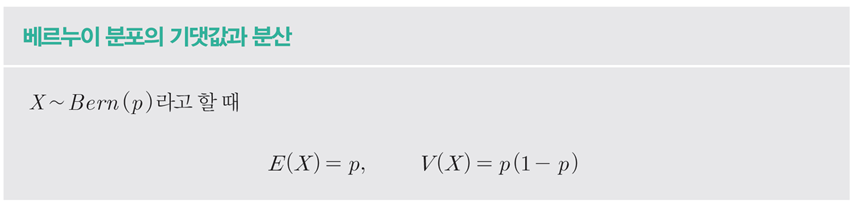

In [7]:
# 기댓값과 분산 계산
# 사용자 정의 함수  : check_prob(X)
# X 는 성공할 확률이 0.3인 베르누이 분포
check_prob(X)

expected value 0.3
variance 0.21


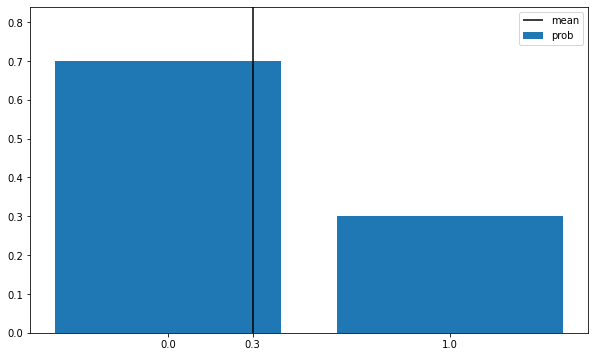

In [8]:
# 평균과 확률분포(확률의 면적-분산)와의 관계
plot_prob(X)

# scipy.stats 모듈

- SciPy는 각종 수치 해석 기능을 제공하는 파이썬 패키지

    - SciPy는 여러개의 서브 패키지로 구성되어 있는데 그 중 scipy.stats 서브패키지는 여러가지 확률 분포 분석을 위한 기능을 제공
    
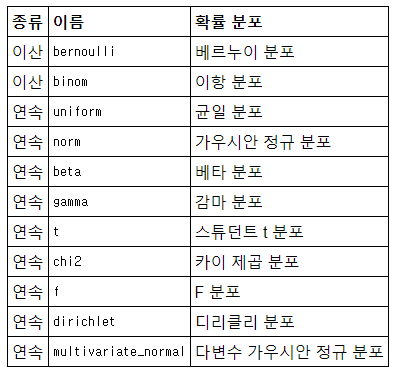

In [9]:
from scipy import stats
# scipy.stats 모듈을 사용해 베르누이분포 변수 생성
# 인수로 확률 파라미터를 취하고 베르누이 분포를 따르는 object를 반환함
# rv는 확률변수(확률분포)에 해당 함
p = 0.3
rv = stats.bernoulli(p)

# 성공확률 0.3을 갖는 베르누이분포를 따르는 확률변수(분포) rv

In [10]:
# 0이 나올 확률, 1이 나올 확률
# pmf 메서드 : 확률질량함수 계산 가능
# stats.bernoulli 확률분포 객체의 확률함수 사용메서드 : pmf(확률구하고자하는 값)
rv.pmf(0), rv.pmf(1)

(0.7, 0.3)

In [11]:
rv.pmf(5)

# 성공확률 0.3을 갖는 베르누이분포를 따르는 확률변수 rv는 
# 취할 수 있는 값이 0 또는 1

0.0

In [12]:
# 인수로 리스트를 넘길 수 있음
rv.pmf([0,1,10])

array([0.7, 0.3, 0. ])

In [13]:
# cdf 누적 밀도 함수를 계산
rv.cdf([0,1])

# 0이나올 확률, 0이나 1이 나올 확률

array([0.7, 1. ])

In [14]:
rv.cdf(1)

1.0

In [15]:
# 기댓값(확률변수의 평균)과 분산 계산
rv.pmf(1), rv.pmf(1)*rv.pmf(0)

(0.3, 0.21)

In [16]:
# 확률분포 객체에 포함되어 있는 확률변수의 평균(기댓값), 확률변수의 분산의 함수는?
# 확률분포객체.mean(), 확률분포객체.var()
rv.mean(), rv.var()

(0.3, 0.21)

### 베르누이분포 정리

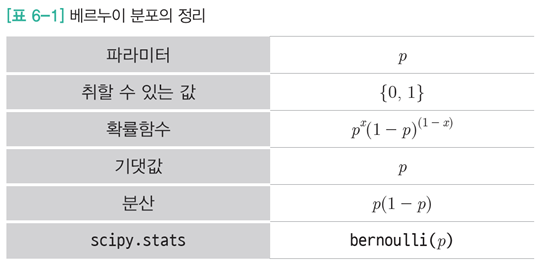

## 이항분포

- 성공확률이 μ 인 베르누이 시행을 N번 반복하는 경우를 생각해보자. 

    - 가장 운이 좋을 때에는 N번 모두 성공할 것이고 가장 운이 나쁜 경우에는 한 번도 성공하지 못할 것이다. 

    - N번 중 성공한 횟수를 확률변수 X라고 한다면 X의 값은 0 부터 N 까지의 정수 중 하나가 될 것이다.

- 이런 확률변수를 **이항분포(binomial distribution)**를 따르는 확률변수라고 하며 다음과 같이 표시한다.
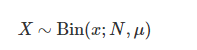

    - 𝑋= 성공의 확률이 𝑝인 베르누이 시행을 𝑛번 반복할 때 성공의 수가 따르는 분포

    - 𝑋가 가질 수 있는 값: 0, 1, 2, …, 𝑛
    - n번 던져서 x번 성공할 확률
    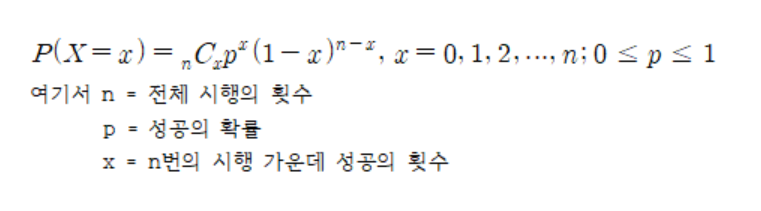

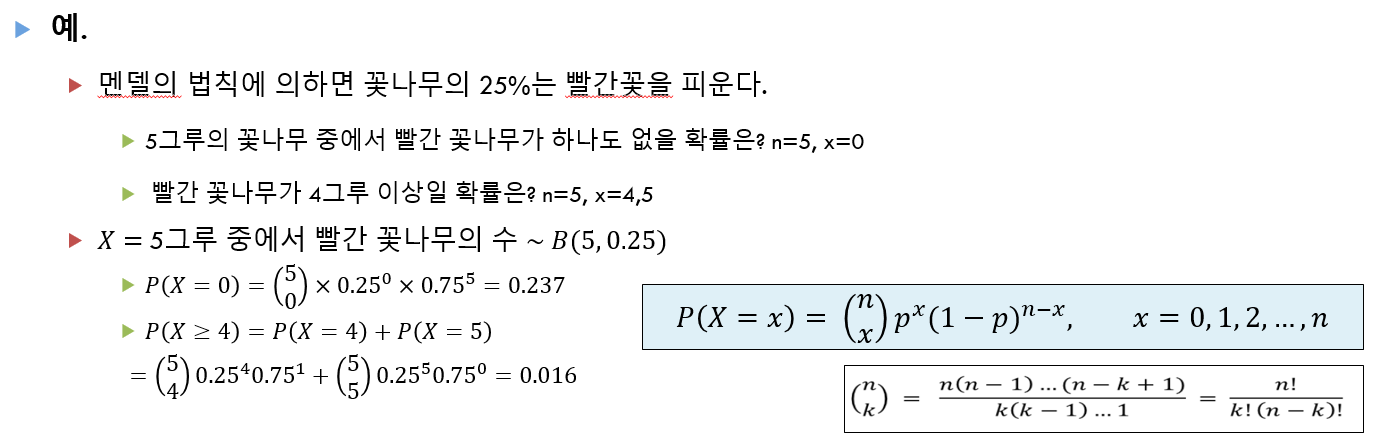

nCk는 n개중 k개를 고르는 방법의 수

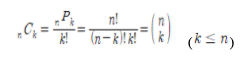

### 위 연산을 실행하는 함수 : comb 

- 1,2,3,4,5 : 총 5그루의 나무가 있을때
- 4그루의 나무에 빨간꽃이 핀다면 경우의 수는?
    - 1,2,3,4
    - 2,3,4,5
    - 3,4,5,1
    - 4,5,1,2
    - 4,1,2,3

## 수식을 사용하여 이항분포 함수 생성

In [17]:
# 5개 중에서 2개를 고르는 방법의 수
from scipy.special import comb
print(comb(5,2))
(5*4*3*2*1)/(2*1*(3*2*1))

10.0


10.000

In [18]:
# 5개 중 0개를 고르는 방법의 수는 1
from scipy.special import comb
com = comb(5,0)
print(com)

1.0


In [19]:
# 5개 중 4개를 고르는 방법의 수는 5
from scipy.special import comb
com = comb(5, 4)
print(com)
(5*4*3*2*1)/(4*3*2*1)*(1)

5.0


5.000

In [20]:
# 5개 중 5개를 고르는 방법의 수는 1
from scipy.special import comb
com = comb(5, 5)
print(com)

1.0


In [21]:
# 이항분포 함수 구성
from scipy.special import comb
def Bin(n,p) : # n은 시행횟수 p는 성공확률
    x_set = np.arange(n+1)
    # 확률함수
    def f(x) :
        if x in x_set :
            return comb(n,x) * p**x * (1-p)**(n-x)
        else :
            return 0
    return x_set, f        

In [22]:
### 멘델의 법칙에 의하면 꽃나무의 25%는 빨간꽃을 피운다. 
# 5그루의 꽃나무가 있을 때 성공확률 0.25인 베르누이 시행을 5번 수행하는 이항분포를 따른다
n=5
p=0.25
X=Bin(n,p)

In [23]:
X  # n은5고 성공확률은 25%인 이항분포를 따르는 X

(array([0, 1, 2, 3, 4, 5]), <function __main__.Bin.<locals>.f(x)>)

In [24]:
# 빨간 꽃나무가 하나도 없을 확률은? n=5, x=0
X[1](0)

0.2373046875

In [25]:
# 빨간 꽃나무가 4그루 이상일 확률은?  n=5, x=4,5
X[1](4)+X[1](5)

0.015625

In [26]:
# 확률변수 X에 대한 기댓값 및 분산
check_prob(X)

expected value 1.25
variance 0.9375


In [27]:
# 꽃나무는 10그루이고 빨간꽃을 필 확률이 0.3이라고 할 때 위 내용을 표현하는 이항분포변수 X를 생성
n = 10
p = 0.3
X = Bin(n, p)

In [28]:
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [29]:
# 확률변수 X의 기대값과 분산
check_prob(X)

expected value 3.0
variance 2.1


In [30]:
# 모든 확률의 합은 1
x_set, f = X
print(x_set, f)

temp = np.array([f(x_k) for x_k in x_set])
print(temp)
temp.sum()

[ 0  1  2  3  4  5  6  7  8  9 10] <function Bin.<locals>.f at 0x7fd564303430>
[2.825e-02 1.211e-01 2.335e-01 2.668e-01 2.001e-01 1.029e-01 3.676e-02
 9.002e-03 1.447e-03 1.378e-04 5.905e-06]


0.9999999999999992

### 위 확률분포는 이산형 확률분포의 조건을 만족함

In [31]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

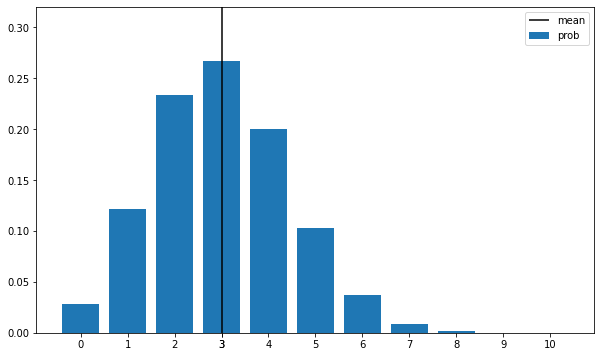

In [32]:
plot_prob(X)

In [33]:
n=10  # 시행횟수, 나무 10그루

### stats.binom() 클래스
- 이항분포 표현 클래스 생성자 함후

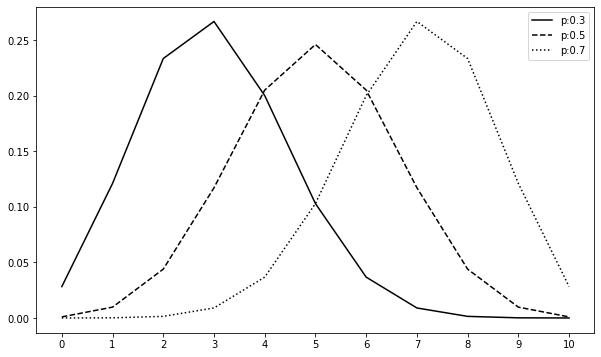

In [34]:
# 10그루의 꽃나무가 있을 때 빨간꽃이 필 확률이 30% 50% 70% 일 때 그래프로 비교
linestyles = ['-', '--', ':']
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)

# 성공확률 0.3, 0.5, 0.7 일 때 비교
for p, ls in zip([0.3,0.5,0.7], linestyles) :
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set),
            label = f'p:{p}', ls=ls, color='black')

ax.set_xticks(x_set)
ax.legend()

plt.show()

# 그래프 모양이 종모양
# 성공확률에 따라 좌우 대칭이 다를 수 있음

### 이항분포 모양
- 성공확률이 0.5에 가까우면 시행회수 n의 크기에 관계 없이 좌우대칭 종모양을 함
- 시행회수 n이 크면 성공확률의 크기에 관계없이 이항분포는 좌우대칭을 이룸
- 성공확률이 0.5보다 작으면 오른쪽 꼬리분포
- 성공확률이 0.5보다 크면 왼쪽꼬리분포

### 파이썬 scipy 모듈의 stats.binom 클래스 사용하여 이항확률변수 생성

- stats.binom(시행횟수, 성공확률) : 생성자 함수
    - 이항분포 객체 변수를 반환

In [35]:
# 성공확률 0.6인 베르누이 시행을 10번 반복 했을 때의 이항분포의 확률변수 : rv
N=10
mu=0.6
rv = stats.binom(N,mu)

In [36]:
xx = np.arange(N + 1)
print(xx) 

# 10번 던져서 한번도 성공하지 않을 경우, 10번 던져서 1번 성공할 경우, 10번 던져서 2번 성공할 경우
# 각 경우에 대한 확률 계산(pmf(xx))
print(rv.pmf(xx))
rv.pmf(xx).sum()

[ 0  1  2  3  4  5  6  7  8  9 10]
[1.049e-04 1.573e-03 1.062e-02 4.247e-02 1.115e-01 2.007e-01 2.508e-01
 2.150e-01 1.209e-01 4.031e-02 6.047e-03]


0.9999999999999994

In [37]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

Unknown system...  sorry~~~


/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLAB

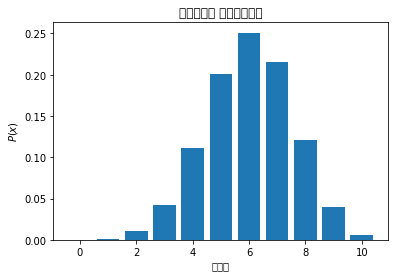

In [38]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx),align='center')
# plt.bar(xx, rv.pmf(xx),align='edge')
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()

### rvs함수

- binom.rvs 함수는 이항분포로 부터 난수를 생성시킴

- 인자 : n, p, size, random_state

In [39]:
from scipy.stats import binom
print(binom.rvs(n=50,p=0.5,size=3))

# 이항분포의 랜덤난수 구하기 : 같은 코드 다른 난수 (주의!)
print(binom.rvs(n=50,p=0.5,size=3))

[17 29 31]
[28 29 23]


In [40]:
# random_state을 이용한 초기값고정: 같은 코드 같은 난수
print(binom.rvs(n=50,p=0.5,size=3, random_state=3))
print(binom.rvs(n=50,p=0.5,size=3, random_state=3))

[25 27 23]
[25 27 23]


In [41]:
# rv 객체 성공확률 0.6이고 시행횟수 10을 따르는 이항분포 객체 : 위에서 생성함
# rvs() 메서드로 무작위 표본을 뽑아내는 시뮬레이션을 한 결과
# 생성되는 난수가 이항분포를 띈다
np.random.seed(0)
x = rv.rvs(100)
print(len(x))
x

100


array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

In [42]:
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ubuntu/anaconda3/envs/python3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLAB

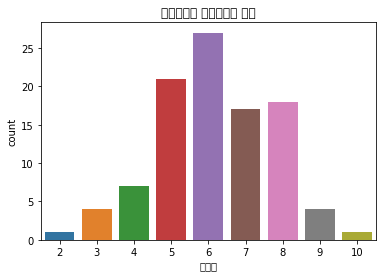

In [43]:
import seaborn as sns
import pandas as pd
X = pd.Series(x)
tmp = pd.DataFrame(X, columns=['x'])
sns.countplot(x='x', data=tmp)
plt.title("이항분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

## 포아송 분포

- 단위 시간 안에 어떤 사건이 몇 번 발생할 것인지를 표현하는 이산 확률 분포이다.

- 일정한 단위시간, 단위거리, 단위면적과 같은 어떤 구간에서 어떤 사건이 랜덤하게 발생하는 경우


    - 𝑋= 일정한 구간에서 다음 조건을 만족하는 특정한 사건의 발생 횟수
        - 아주 짧은 구간에서는 사건이 2회 이상 발생할 확률은 0에 가깝다.
        - 아주 짧은 구간에서 사건이 발생할 확률은 구간의 길이에 비례한다.
        - 서로 겹치지 않는 두 구간에서 발생하는 사건의 수는 서로 독립이다.
        - 구간마다 확률분포는 일정하다.

    
-  예.
    - 119 구조대에 걸려오는 시간 당 전화 횟수
    - 1년 동안 발생하는 진도 4 이상의 지진 횟수
    - 프러시아 기병 중에서 매년 말에 차여 사망하는 병사의 수
    - 한 야구경기에서 실책의 수
    - 서울지역의 5월 중 부도를 낸 중소기업 수


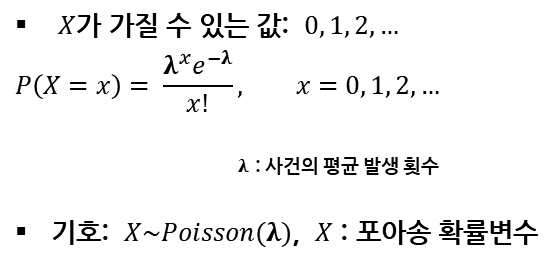

![](포아송식.png)

![](포아송예제.png)

#### 한 시간당 평균 10번 access 하는 사이트에서 시간당 15건 access 할 확률

In [44]:
from scipy.special import factorial
a = (10**15/factorial(15)*np.exp(-10))
format(a,'.10f')

'0.0347180696'

In [45]:
# 편의상 x_set을 0이상 19이하인 정수로 가정
from scipy.special import factorial

def Poi(lam) : # lam - 평균발생횟수
    x_set = np.arange(20)
    def f(x) : 
        if x in x_set : 
            return lam**x / factorial(x) * np.exp(-lam)
        else : 
            return 0
    return x_set, f

In [46]:
lam = 10  # 평균 발생 횟수
X = Poi(lam)
s_set, f = X
a= f(15)
format(a,'.10f')  # 3.5%의 확률로 나타난다.

'0.0347180696'

In [47]:
# 50분동안 평균 3회 휴대전화가 울릴때 50분동안 1번 이상 울릴 확률은?
# 1번 울릴 확률, 2번 울릴 확률, ..., n번 울릴 확률의 합

In [48]:
# 1번 이상 울리는 것은 1번 이상 ~ 무한대를 의미
# 이산확률의 합은 1이고 1번 이상 울릴 확률은 한번도 울리지 않을 확률을 1에서 빼서 계산
lam = 3
X = Poi(lam)
x_set, f=X
a = 1-f(0)
format(a, '.10f')

'0.9502129316'

In [49]:
# scipy 패키지의 함수  poisson(평균발생횟수) 사용
lam = 3
rv = stats.poisson(lam)

# 평균발생횟수가 3인 포아송분포를 따른 확률변수 rv에 대해 발생횟수가 0일 확률
rv.pmf(0)  

0.04978706836786394

In [50]:
# 평균발생횟수가 3인 포아송분포를 따른 확률변수 rv에 대해 발생횟수가 1 이상일 확률
1-rv.pmf(0)

0.950212931632136

In [51]:
print(x_set) 
prob=f(x_set)

# 평균 발생 횟수가 3번인 상황에서 0 번 발생 확률, 1번 발생 확률 2번 발생확률 3번 발생확률
prob

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


array([4.979e-02, 1.494e-01, 2.240e-01, 2.240e-01, 1.680e-01, 1.008e-01,
       5.041e-02, 2.160e-02, 8.102e-03, 2.701e-03, 8.102e-04, 2.210e-04,
       5.524e-05, 1.275e-05, 2.732e-06, 5.463e-07, 1.024e-07, 1.808e-08,
       3.013e-09, 4.757e-10])

In [52]:
# 평균 발생횟수 3인 포아송분포를 따르는 확률분포변수 X
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <function __main__.Poi.<locals>.f(x)>)

In [53]:
# 기댓값과 분산 계산(평균발생횟수)
check_prob(X)

expected value 3.0
variance 3.0


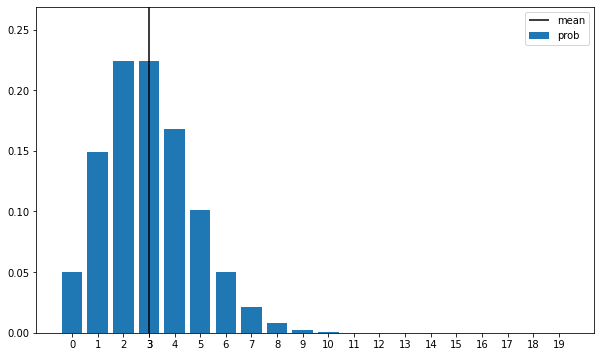

In [54]:
plot_prob(X)

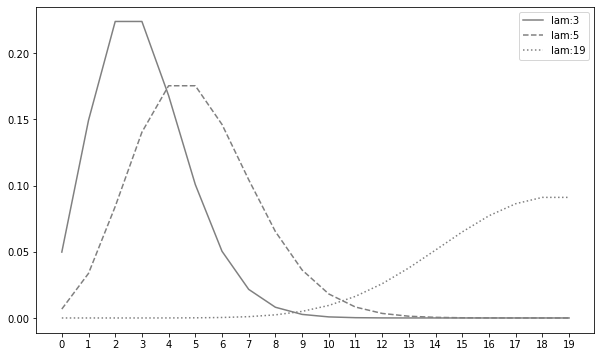

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 19], linestyles):
    rv = stats.poisson(lam) # 포아송 확률 변수 rv
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

### 포아송 분포 그래프 특징
- 평균발생횟수가 적을수록 오른쪽 꼬리가 긴 분포면서 그래프 높이가 높다.
    - 확률차이가 있고
- 횟수가 많아질수록 왼쪽 꼬리가 길어지면서 그래프 높이가 낮아진다.
    - 확률차이가 적어진다.